<a href="https://colab.research.google.com/github/Gisselo/Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [12]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [11]:
##Calcular ingresos de las tiendas
ingreso_Total1 = tienda['Precio'].sum()
ingreso_Total2 = tienda2['Precio'].sum()
ingreso_Total3 = tienda3['Precio'].sum()
ingreso_Total4 = tienda4['Precio'].sum()

##Mostrar resultados
print("Ingresos Tienda 1:", ingreso_Total1)
print("Ingresos Tienda 2:", ingreso_Total2)
print("Ingresos Tienda 3:", ingreso_Total3)
print("Ingresos Tienda 4:", ingreso_Total4)

Ingresos Tienda 1: 1150880400.0
Ingresos Tienda 2: 1116343500.0
Ingresos Tienda 3: 1098019600.0
Ingresos Tienda 4: 1038375700.0


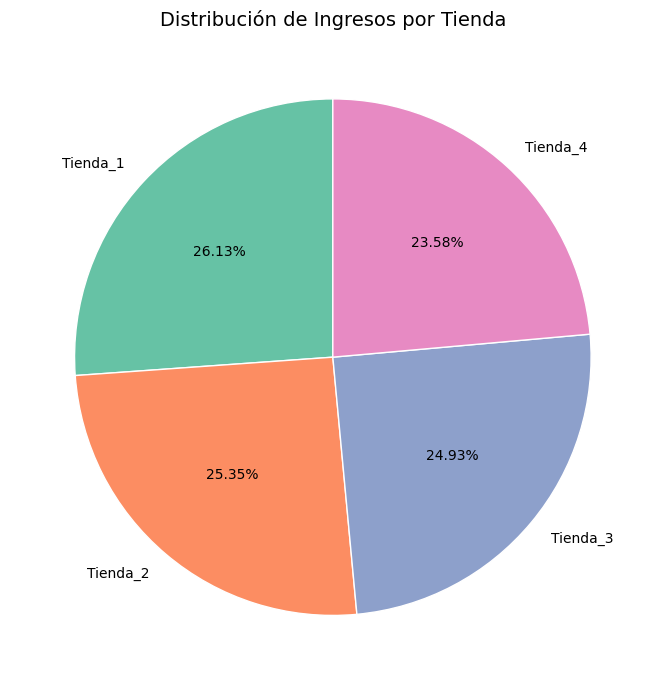

In [15]:
#Datos
tiendas= ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']
ingresos_tiendas = [ingreso_Total1,ingreso_Total2,ingreso_Total3,ingreso_Total4]

#Colores grafica
colores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Gráfico de pastel
plt.figure(figsize=(7,7))
plt.pie(
    ingresos_tiendas,
    labels=tiendas,
    autopct='%1.2f%%',
    startangle=90,
    colors=colores,
    wedgeprops={'edgecolor': 'white'}
)

#Mostrar grafica
plt.title('Distribución de Ingresos por Tienda', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [16]:
ventas_por_categoria = {}
#Iterar sobre los DataFrames de las tiendas
for nombre, df in {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}.items():
   #contar las ventas por categoría en cada tienda
    conteo = df['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombre]=conteo


In [17]:
# Colores personalizados
colores = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

# Pproductos vendidos por categoría en cada tienda
ventas_tienda1 = tienda['Categoría del Producto'].value_counts()
ventas_tienda2 = tienda2['Categoría del Producto'].value_counts()
ventas_tienda3 = tienda3['Categoría del Producto'].value_counts()
ventas_tienda4 = tienda4['Categoría del Producto'].value_counts()

# Unir los conteos
ventas_categoria = pd.DataFrame({
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0).astype(int)

# Mostrar tabla
display(ventas_categoria)


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


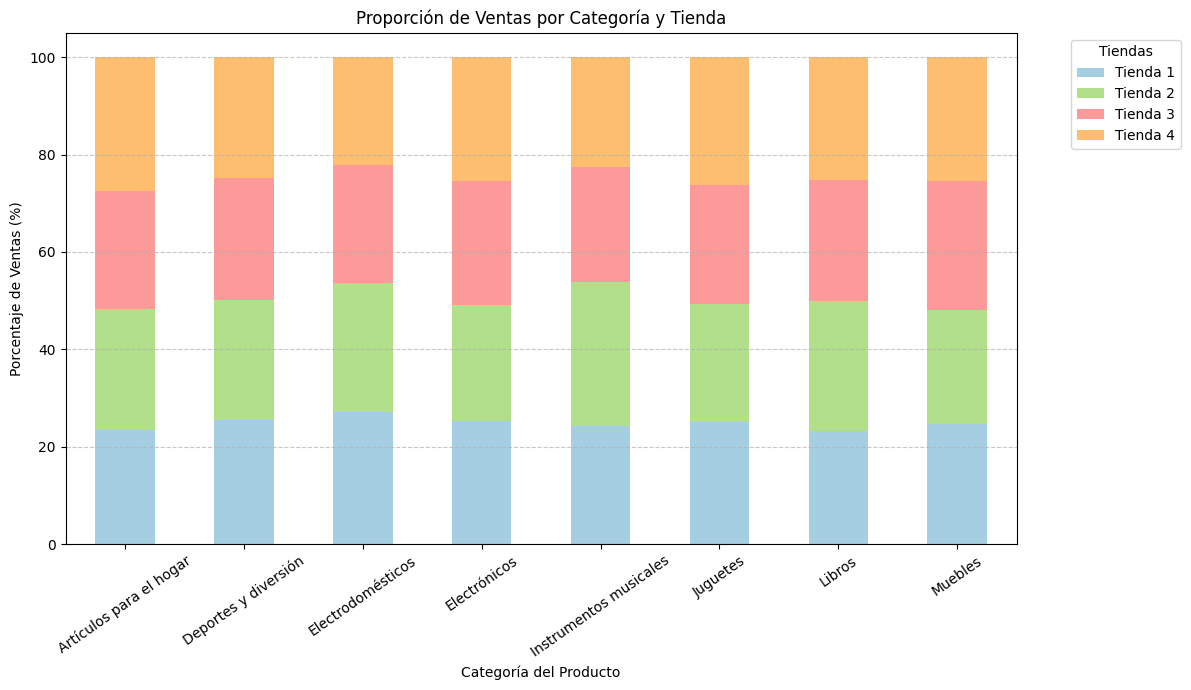

In [18]:
colores = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

# Calcular porcentajes
ventas_pct = ventas_categoria.div(ventas_categoria.sum(axis=1), axis=0) * 100

# Gráfico de barras apiladas normalizadas
ax = ventas_pct.plot(kind='bar', stacked=True, figsize=(12,7), color=colores)

# Títulos y etiquetas
plt.title('Proporción de Ventas por Categoría y Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Porcentaje de Ventas (%)')

# Etiquetas del eje X
plt.xticks(rotation=35, ha='center')

# Leyendas
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rejilla
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste final
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [19]:
#Calcular la calificación promedio de cada tienda
Calificación_promedio=tienda['Calificación'].mean()
Calificación_promedio2=tienda2['Calificación'].mean()
Calificación_promedio3=tienda3['Calificación'].mean()
Calificación_promedio4=tienda4['Calificación'].mean()

#Imprimir los Resultados
print(f'Calificación promedio de la 1era tienda: {Calificación_promedio:.2f}')
print(f'Calificación promedio de la 2da tienda: {Calificación_promedio2:.2f}')
print(f'Calificación promedio de la 3ra tienda: {Calificación_promedio3:.2f}')
print(f'Calificación promedio de la 4ta tienda: {Calificación_promedio4:.2f}')

Calificación promedio de la 1era tienda: 3.98
Calificación promedio de la 2da tienda: 4.04
Calificación promedio de la 3ra tienda: 4.05
Calificación promedio de la 4ta tienda: 4.00


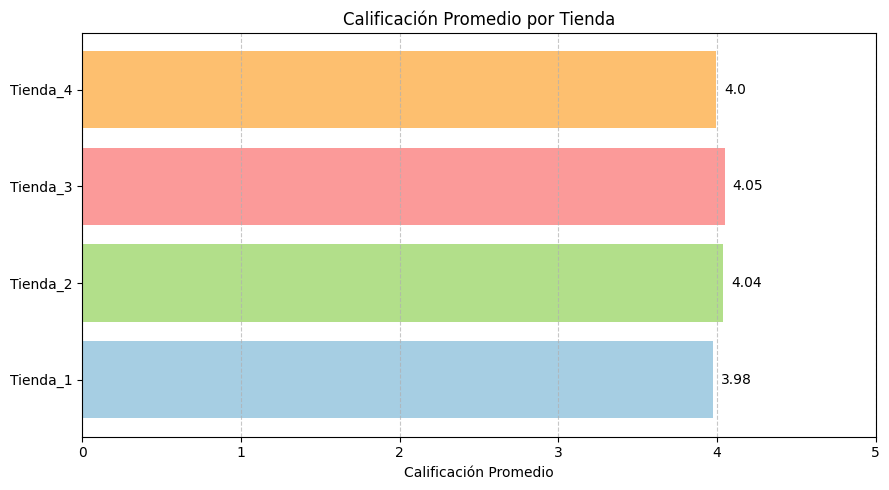

In [20]:
# Lista de calificaciones
calificacion = [Calificación_promedio, Calificación_promedio2, Calificación_promedio3, Calificación_promedio4]

colores = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

plt.figure(figsize=(9,5))
plt.barh(tiendas, calificacion, color=colores)

# Títulos y etiquetas
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar valores dentro o al final de cada barra
for i, valor in enumerate(calificacion):
    plt.text(valor + 0.05, i, round(valor, 2), va='center')

plt.tight_layout()
plt.show()


# 4 Productos más y menos vendidos
vendidos

Top 5 productos más vendidos:
          Producto  Cantidad Vendida
0    Kit de bancas                57
1  Mesa de comedor                56
2        Cama king                56
3     Set de ollas                55
4    Mesa de noche                55

Top 5 productos menos vendidos:
                   Producto  Cantidad Vendida
46       Guitarra eléctrica                38
47             Set de vasos                36
48                  Mochila                36
49               Microondas                36
50  Bloques de construcción                35


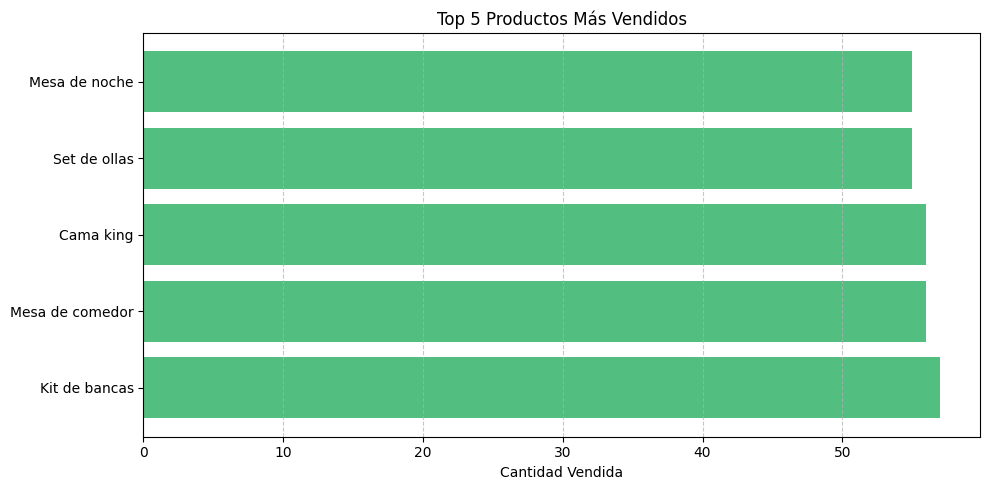

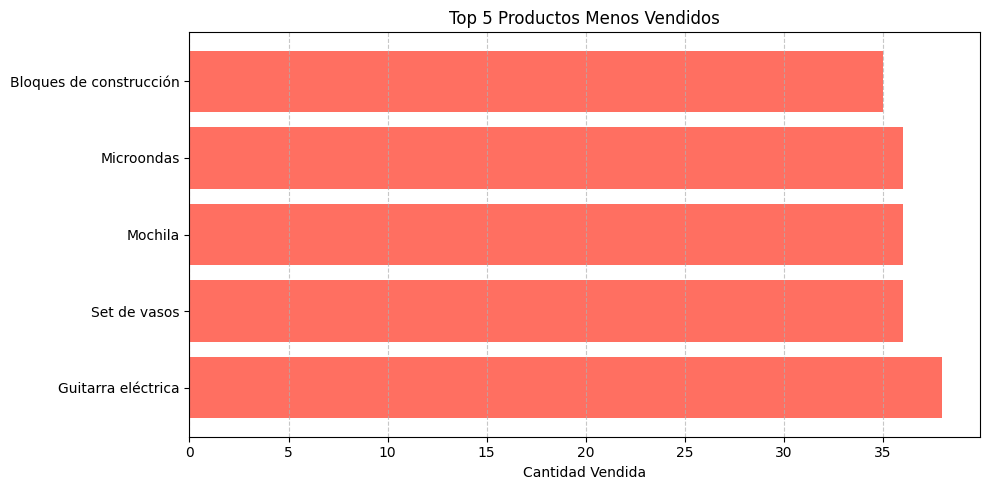

In [29]:
import matplotlib.pyplot as plt

# Contar cantidad de ventas por producto
ventas_por_producto = df['Producto'].value_counts().reset_index()
ventas_por_producto.columns = ['Producto', 'Cantidad Vendida']

# Top 5 productos más vendidos
top_5_mas_vendidos = ventas_por_producto.head(5)

# Top 5 productos menos vendidos
top_5_menos_vendidos = ventas_por_producto.tail(5)

# Mostrar tablas
print("Top 5 productos más vendidos:")
print(top_5_mas_vendidos)

print("\nTop 5 productos menos vendidos:")
print(top_5_menos_vendidos)

# Graficar Top 5 más vendidos
plt.figure(figsize=(10, 5))
plt.barh(top_5_mas_vendidos['Producto'], top_5_mas_vendidos['Cantidad Vendida'], color='#52be80')
plt.xlabel('Cantidad Vendida')
plt.title('Top 5 Productos Más Vendidos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Graficar Top 5 menos vendidos
plt.figure(figsize=(10, 5))
plt.barh(top_5_menos_vendidos['Producto'], top_5_menos_vendidos['Cantidad Vendida'], color='#ff6f61')
plt.xlabel('Cantidad Vendida')
plt.title('Top 5 Productos Menos Vendidos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Envio promedio por tienda

In [30]:

envio_promedio1 = tienda['Costo de envío'].mean()
envio_promedio2 = tienda2['Costo de envío'].mean()
envio_promedio3 = tienda3['Costo de envío'].mean()
envio_promedio4 = tienda4['Costo de envío'].mean()

# Mostrar resultados
print(f"Envío promedio - Tienda 1: ${envio_promedio1:.2f}")
print(f"Envío promedio - Tienda 2: ${envio_promedio2:.2f}")
print(f"Envío promedio - Tienda 3: ${envio_promedio3:.2f}")
print(f"Envío promedio - Tienda 4: ${envio_promedio4:.2f}")


Envío promedio - Tienda 1: $26018.61
Envío promedio - Tienda 2: $25216.24
Envío promedio - Tienda 3: $24805.68
Envío promedio - Tienda 4: $23459.46


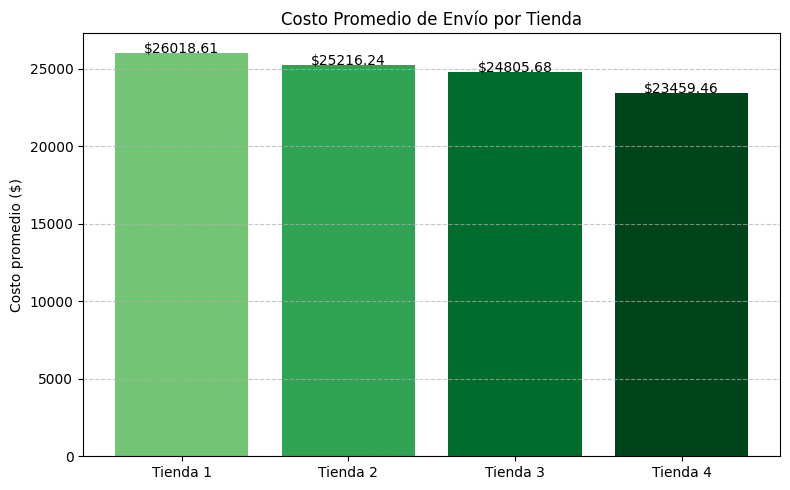

In [31]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios_promedio = [envio_promedio1, envio_promedio2, envio_promedio3, envio_promedio4]
colores = ['#74c476', '#31a354', '#006d2c', '#00441b']  # tonos verdes

plt.figure(figsize=(8,5))
plt.bar(tiendas, envios_promedio, color=colores)
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(envios_promedio):
    plt.text(i, v + 0.1, f"${v:.2f}", ha='center')

plt.tight_layout()
plt.show()


# Conclusiones

Después de evaluar los principales indicadores de desempeño, se sugiere que el Sr. Juan considere la venta de la Tienda 4. Esta unidad presenta consistentemente los menores resultados en aspectos clave, tales como:

Generación de ingresos, siendo la más baja
entre todas las tiendas.

Menor participacion en las ventas por categoría.

La desinversión en esta tienda permitirá concentrar recursos y esfuerzos en las unidades con mejor rendimiento, favoreciendo así la optimización de estrategias para mejorar la satisfacción del cliente y la eficiencia operacional. Este análisis proporciona un soporte cuantitativo sólido para respaldar esta decisión estratégica.